In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

current_year = datetime.datetime.now().year

In [273]:
df = pd.read_csv('c:/Users/AH0514/OneDrive - Mubea/Desktop/movies.csv')
df = df.drop_duplicates()
df = df.drop_duplicates(subset=['MOVIES'], keep='first')

In [280]:
#print(df.head())
print(df.columns)

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross', 'Start_Year', 'End_Year', 'Duration'],
      dtype='object')


In [281]:
df['ONE-LINE'] = df['ONE-LINE'].str.strip().str.replace('\n', '', regex=False)
df['GENRE'] = df['GENRE'].str.strip().str.replace('\n', '', regex=False)
df['STARS'] = df['STARS'].str.strip().str.replace('\n', '', regex=False).str.replace('|', '\n', regex=False)
df['RATING'] = df['RATING'].fillna(0)
df['VOTES'] = df['VOTES'].fillna(0)
df['RunTime'] = df['RunTime'].fillna(0).astype(int)
df['Gross'] = df['Gross'].fillna(0)
df['YEAR'] = df['YEAR'].str.strip().str.replace('(', '', regex=False).str.replace(')', '', regex=False).str.replace('–', '-', regex=False).str.replace(r'[\(\)]', '', regex=True).str.strip()
df[['Start_Year', 'End_Year']] = df['YEAR'].str.split('-', expand=True)

df['Start_Year'] = df['Start_Year'].str.extract(r'(\d{4})')
df['End_Year'] = df['End_Year'].str.extract(r'(\d{4})')


df['Start_Year'] = pd.to_numeric(df['Start_Year'], errors='coerce').fillna(0).astype(int)
df['End_Year'] = pd.to_numeric(df['End_Year'], errors='coerce').fillna(0).astype(int)

df['Duration'] = np.where(df['End_Year'] == 0, current_year - df['Start_Year'], df['End_Year'] - df['Start_Year']) + 1


In [282]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Start_Year,End_Year,Duration
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth Stars:Peri Baumei...,"21,062",121,0,2021,0,5
1,Masters of the Universe: Revelation,2021-,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25,0,2021,0,5
2,The Walking Dead,2010-2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44,0,2010,2022,13
3,Rick and Morty,2013-,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23,0,2013,0,13
4,Army of Thieves,2021,"Action, Crime, Horror",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer Stars:Matth...,0,0,0,2021,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,The Imperfects,2021-,"Adventure, Drama, Fantasy",0.0,Add a Plot,"Stars:Morgan Taylor Campbell, Chris Cope, Iñak...",0,0,0,2021,0,5
9964,AlRawabi School for Girls,2021,Drama,0.0,Add a Plot,"Director:Tima Shomali Stars:Salsabiela A.,...",0,0,0,2021,0,5
9993,Totenfrau,2022-,"Drama, Thriller",0.0,Add a Plot,"Director:Nicolai Rohde Stars:Felix Klare, ...",0,0,0,2022,0,4
9995,Arcane,2021-,"Animation, Action, Adventure",0.0,Add a Plot,,0,0,0,2021,0,5


In [283]:
plot_df = df[(df['RATING'] > 0) & (df['Duration'] > 4)]

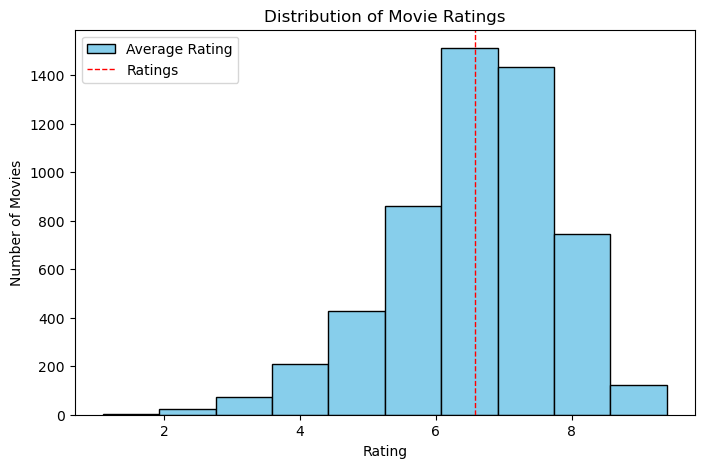

In [284]:
plt.figure(figsize=(8, 5))
plot_df['RATING'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')

avg_rating = plot_df['RATING'].mean()
plt.axvline(x=avg_rating, color='red', linestyle='dashed', linewidth=1)

plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')   
plt.ylabel('Number of Movies')
plt.legend(['Average Rating', 'Ratings'])
plt.show()

In [285]:
plot_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Start_Year,End_Year,Duration
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth Stars:Peri Baumei...,"21,062",121,0,2021,0,5
1,Masters of the Universe: Revelation,2021-,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25,0,2021,0,5
2,The Walking Dead,2010-2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44,0,2010,2022,13
3,Rick and Morty,2013-,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23,0,2013,0,13
5,Outer Banks,2020-,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cline, Madison Bai...","25,858",50,0,2020,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,Director:Colin Barnicle Stars:Nancy Clough...,175,53,0,2021,0,5
9837,Dead Places,2021-,"Adventure, Horror, Thriller",6.4,"While filming a social media stunt, a vlogger ...","Directors:Gareth Crocker, Fred Wolmarans S...",28,0,0,2021,0,5
9901,Modern Family,2009-2020,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...","Director:Jason Winer Stars:Ed O'Neill, Sof...","3,404",23,0,2009,2020,12
9915,Girl From Nowhere,2018-,"Crime, Drama, Fantasy",7.8,Nanai is a popular boy in school with a bad ha...,Director:Pairach Khumwan Stars:Chicha Amat...,183,0,0,2018,0,8
